In [36]:
from math import log

#计算给定值的熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        labelCounts[currentLabel] = labelCounts.get(currentLabel, 0) + 1
#         if currentLabel not in labelCounts.keys():
#             labelCounts[countLabel] = 0
#         labelCounts[curentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no'],
              ]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

dataSet, labels = createDataSet()
# shannonEnt = calcShannonEnt(dataSet)
# print(shannonEnt)


#划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

# print(dataSet)
# x = splitDataSet(dataSet, 0, 1)
# print(x)

'''
(1)数据必须是列表元素组成的列表，所有列表元素都具有相同的长度
(2)数据的最后一列或者每个实例的最后一个元素是该实例的类别标签
(3)返回的结果是第几个特征值
'''
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1 #遍历时最后一个元素是类别，不算在内
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    baseFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        classCount[vote] = classCount.get(vote, 0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    '''
    停止条件（1）
    所有的类标签完全相同，表明可以直接归为一类，已划分好
    '''
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    '''
    停止条件（2）
    遍历完了所有的特征，仍不能将数据集划分成仅包含唯一类别的分组，
    这里我们挑选出现次数最多的类别
    '''    
    if len(dataSet[0]) == 1:#元素已是最后一个列表
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}} #这里树被声明成一个字典，也可以是其他数据结构
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
#         subLabels = labels[:]
        subLabels = labels
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

# dataSet, labels = createDataSet()
myTree = createTree(dataSet, labels)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [27]:
datas = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
# for i in datas:
#     print(i)
# for i in range(3):
#     xdata = [data[i] for data in datas]
#     xxxx = set(xdata)
#     print(xdata)
print(datas[:])

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]


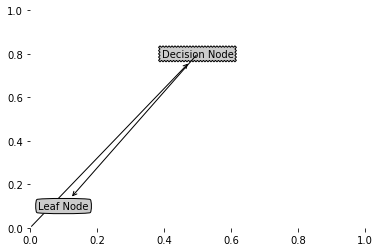

In [37]:
#-*- coding:utf-8 –*-

'''
使用文本注解绘制树节点
'''
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

zhfont1 = matplotlib.font_manager.FontProperties(fname="../SimHei.ttf") 

'''
定义文本框和箭头格式
'''
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

'''
绘制带箭头的注解
'''
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.axl.annotate(nodeTxt, xy = parentPt, xycoords = "axes fraction",
                           xytext = centerPt, textcoords = "axes fraction", 
                           va = "center", ha = "center", bbox = nodeType, arrowprops=arrow_args)

def createPlot():
    fig = plt.figure(1, facecolor = "white")
    fig.clf()
    createPlot.axl = plt.subplot(111, frameon=False)
    plotNode('Decision Node', (0.5, 0.8), (0,0), decisionNode)
    plotNode('Leaf Node', (0.1, 0.1), (0.5, 0.8), leafNode)
    plt.show()

createPlot()
# help(plotNode)
# plotNode(nodeTxt, centerPt, parentPt, nodeType)

In [38]:
'''
获取叶子节点数目
'''
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:#测试数据类型是dict
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1 #此时已到底了
    return numLeafs

'''
获取树的层数
'''
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:#测试数据类型是dict
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1  #此时已到底了
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


print("叶子节点", getNumLeafs(myTree))
print("树深度", getTreeDepth(myTree))

叶子节点 3
树深度 2


plotTree.yOff的尺寸0 0.5
plotTree.yOff的尺寸0 0.0
plotTree.yOff的尺寸1 0.5
plotTree.yOff的尺寸0 0.0
plotTree.yOff的尺寸1 0.5
plotTree.yOff的尺寸1 1.0


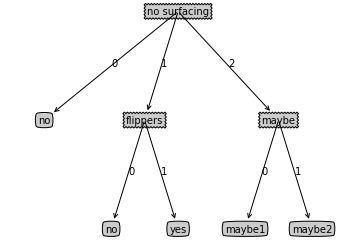

In [39]:
'''
画树
'''
# import pdb
# pdb.set_trace()

'''
在父子节点中填充文本信息，就是箭头中间写的0 or 1
'''
def plotMidText(centerPt, parentPt, txtString):
    xMid = (parentPt[0] + centerPt[0])/2.0
    yMid = (parentPt[1] + centerPt[1])/2.0
    createPlot.axl.text(xMid, yMid, txtString)

'''
    树大小为长1宽1. 树根据叶子节点个数和树的高度，进行重画
    画的顺序 类似于二叉树的先序遍历  根左右
'''
def plotTree(myTree, parentPt, nodeText):
    numLeafs = getNumLeafs(myTree) # 相当于计算树的宽
    depth = getTreeDepth(myTree)  # 相当于计算树的高
    firstStr = list(myTree.keys())[0]
    centerPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,
               plotTree.yOff)
    plotMidText(centerPt, parentPt, nodeText)
    plotNode(firstStr, centerPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    print("plotTree.yOff的尺寸0", plotTree.yOff)
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:
            plotTree(secondDict[key], centerPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), 
                    centerPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), centerPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD  #加回原来的高度
    print("plotTree.yOff的尺寸1", plotTree.yOff)

def createPlot(inTree):
    fig = plt.figure(1, facecolor = "white")
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    '''
    **axprops关闭坐标轴配置
    也可以写成
    plt.axis('off') #关闭坐标轴，
    或者，关闭坐标轴 x，y 
    plt.xticks([])
    plt.yticks([])
    '''
    createPlot.axl = plt.subplot(111, frameon = False, **axprops)
#     print(plt.xticks)
#     createPlot.axl = plt.subplot(111, frameon = False)
    #定义 plotTree 的全局变量
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), "")
    plt.show()

myTree["no surfacing"][2] = {"maybe":{"0":"maybe1","1":"maybe2"}}
createPlot(myTree)

In [41]:
'''
分类，
inputTree 决策树
featLabels 特征值标签
testVec 输入要测试验证的特征值数据
'''
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]) == dict:
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

dataSet, labels = createDataSet()
# labels
classify(myTree, labels, [1,1])

'yes'

In [44]:
import pickle
'''
序列化对象
'''
def storeTree(inputTree, filename):
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabeTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

storeTree(myTree, 'classifierStorage.txt')
grabeTree('classifierStorage.txt')

{'no surfacing': {0: 'no',
  1: {'flippers': {0: 'no', 1: 'yes'}},
  2: {'maybe': {'0': 'maybe1', '1': 'maybe2'}}}}